<a href="https://colab.research.google.com/github/hwuiwon/ML_study/blob/master/Machine_Learning_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning**
---

Self-learning algorithms that derive knowledge from data in order to make predictions.

##**Types of Machine Learning**
**Supervised Learning**: Learn a model from labeled training data to make predictions about future data

**Unsupervised Learning**: Organizing a pile of information into meaningful subgroups without having any prior knowledge of their group memberships

**Reinforcement Learning**: Goal is to develop a system that improves its performance based on interactions with the environment


## **Terminology**

**Training**: Model fitting for parametric models similar to parameter estimation

**Samples**: Instances of what we are measuring

**Features**: Measurements of a sample, A column in a data table or data matrix

**Targets**: Stnonymous with outcome, output, response variable, dependent variable, label, and ground truth

**Loss Function**: *cost function*, "loss" refers to the loss measured for a single data point, and the cost is a measurement that computes the loss over the entire dataset

**Epoch**: One cycle through the full training dataset

## **Rosenblatt's Perceptron Rule**

1.   Initialize the weights to 0 or small random numbers
2.   For Each training example x(i):
3.   Compute the output value y & Update the weights

If the two classes can't be seperated by a linear decision boundary, we can set a maximum number of passes over the training dataset (**epochs**) or a threshold for the number of tolerated misclassifications - the perceptron would never stop updating the weights otherwise:

**Threshold Function**: $w_1x_1+w_2x_2+b=z$

Where $y=\begin{cases}1&(z > 0)\\-1\end{cases}$

### **Implementation**

In [0]:
import numpy as np

class Perceptron(object) :

  """

  Parameters
  ------------
  eta : float
  Learning rate (between 0.0 and 1.0)
  n_iter : int
  Passes over the training dataset.
  random_state : int
  Random number generator seed for random weight initialization.
  
  """

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
    
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

It is important **not** to initialize the weights to 0 because the learning rate (eta), only has an effect on the classification outcome if the weights are initialized to non-zero values.

If all the weights are 0, the learning rate parameter affects only the **scale of the weight vector, not the direction**.

In [0]:
import os
import pandas as pd

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases','iris','iris.data')
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


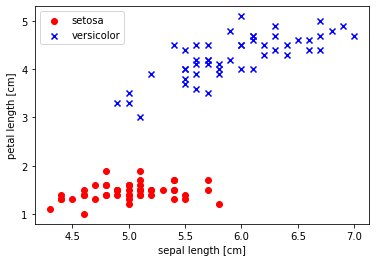

In [0]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]') # column index 0
plt.ylabel('petal length [cm]') # column index 1
plt.legend(loc='upper left')
plt.show()

We can see that a **linear decision** boundary should be sufficient to separate Setora from Versicolor flowers.

It's time to train our perceptron algorithm.

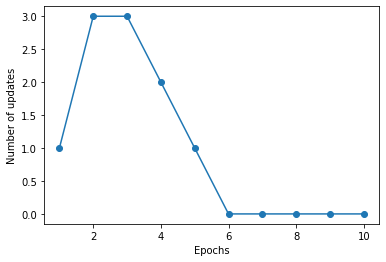

In [0]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

After the **sixth** epoch, our perceptron converged, which means that it is able to classify the training examples perfectly.

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], 
              marker=markers[idx], label=cl, edgecolor='black')

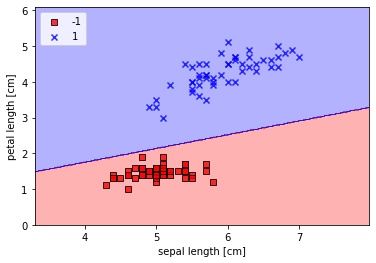

In [0]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## **Adaptive Linear Neuron (Adaline)**

Illustrates the key concepts of defining and minimizing continuous cost functions.

### **Key Difference with Rosenblatt's Perceptrion**

Weights are **updated based on a linear activation function** rather than a unit step function.

**Linear activation function**: $\phi(w_T*x) = w_T*x$<br>Simply the identity function of the net input.

![Concept](https://drive.google.com/uc?id=1GiTCk61D8o7agrtd4hNwwo5KThE6KR6d)

In [0]:
class AdalineGD(object):

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)

    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def activation(self, X):
    return X

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

## **Used Methods**

#### ***Iloc***

```
DataFrame.iloc[x, y]
```
where **x** is array and **y** is limits

In [0]:
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
          {'a': 100, 'b': 200, 'c': 300, 'd': 400},
          {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000 }]
md = pd.DataFrame(mydict)
print(md)
md.iloc[[0, 2], [1, 3]]

      a     b     c     d
0     1     2     3     4
1   100   200   300   400
2  1000  2000  3000  4000


,b,d
0,2,4
2,2000,4000
